In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import bioframe
import numpy as np
import seaborn as sns
import matplotlib

In [2]:
gm_df = pd.read_csv('../annotations/GM12878_hg38_50kb.tsv', sep = '\t')
gm_df.head()

,chrom,start,end,KR,VC,VC_SQRT,weight,GC,E1,E2,E3,binary,HMM2,HMM3,HMM3P
0,chr1,0,50000,0.012247,0.001838,0.032337,NaN,0.484250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,50000,100000,0.047586,0.010207,0.076204,NaN,0.376740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,100000,150000,0.050368,0.015204,0.093003,NaN,0.429960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,150000,200000,0.059842,0.013402,0.087317,NaN,0.486340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,200000,250000,NaN,0.000232,0.011488,NaN,0.480564,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
im_df = pd.read_csv('../annotations/IMR90_hg38_50kb.tsv', sep = '\t')
im_df.head()

,chrom,start,end,KR,VC,VC_SQRT,weight,GC,E1,E2,E3,binary,HMM2,HMM3,HMM3P
0,chr1,0,50000,0.011192,0.001988,0.037799,NaN,0.484250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,50000,100000,0.154982,0.026789,0.138755,NaN,0.376740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,100000,150000,0.046705,0.007207,0.071968,NaN,0.429960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,150000,200000,0.087255,0.012972,0.096555,NaN,0.486340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,200000,250000,0.011123,0.000895,0.025357,NaN,0.480564,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
gencode = pd.read_csv('../data/gencode.v37.annotation.gff3.gz',
               names=['chrom','annot','type','start','stop','na1','strand','na2','genestuff'],
                      delimiter='\t',skiprows=7)

genes = gencode.loc[gencode['type'].values=='gene']
genes.rename(columns={'stop':'end'}, inplace=True)
genes = genes.astype({'start':int,'end':int})
### need to join gene table & expression table
geneNames =  genes['genestuff'].str.split(';')
genes['Description'] = [i[3].split('=')[1] for i in geneNames]
genes['Name'] = [i[0].split('=')[1] for i in geneNames]
genes.head()

/pollard/home/lchumpitaz/miniconda3/envs/HC2/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,chrom,annot,type,start,end,na1,strand,na2,genestuff,Description,Name
0,chr1,HAVANA,gene,11869,14409,.,+,.,ID=ENSG00000223972.5;gene_id=ENSG00000223972.5...,DDX11L1,ENSG00000223972.5
12,chr1,HAVANA,gene,14404,29570,.,-,.,ID=ENSG00000227232.5;gene_id=ENSG00000227232.5...,WASH7P,ENSG00000227232.5
25,chr1,ENSEMBL,gene,17369,17436,.,-,.,ID=ENSG00000278267.1;gene_id=ENSG00000278267.1...,MIR6859-1,ENSG00000278267.1
28,chr1,HAVANA,gene,29554,31109,.,+,.,ID=ENSG00000243485.5;gene_id=ENSG00000243485.5...,MIR1302-2HG,ENSG00000243485.5
36,chr1,ENSEMBL,gene,30366,30503,.,+,.,ID=ENSG00000284332.1;gene_id=ENSG00000284332.1...,MIR1302-2,ENSG00000284332.1


In [6]:
expression = pd.read_csv('../data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz'
               ,delimiter='\t', skiprows = 2)
expression.head()

,Name,Description,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
0,ENSG00000223972.5,DDX11L1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.166403,0.00000,0.00000,0.00000,0.00000
1,ENSG00000227232.5,WASH7P,4.06403,3.37111,2.68549,4.04762,3.90076,3.63963,5.16375,1.43859,...,5.93298,6.13265,4.19378,5.92631,3.06248,4.702530,6.27255,7.19001,5.74554,2.64743
2,ENSG00000278267.1,MIR6859-1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.054223,0.00000,0.00000,0.00000,0.00000
4,ENSG00000237613.2,FAM138A,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000


In [7]:
t = expression.set_index('Name').join(genes.set_index('Name'),rsuffix='_')

In [8]:
expressed_genes = t.copy()
expressed_genes.reset_index(inplace=True)
expressed_genes = expressed_genes[['chrom','start','end','strand','Cells - EBV-transformed lymphocytes', 'Lung']]
expressed_genes = expressed_genes.iloc[~pd.isnull(expressed_genes['chrom'].values)]
expressed_genes.sort_values(['chrom','start','end'],inplace=True)
expressed_genes['start'] = expressed_genes['start'].values.astype(int) #since just using .astype() method wasn't working..
expressed_genes['end'] = expressed_genes['end'].values.astype(int)
expressed_genes = expressed_genes[expressed_genes['chrom'].isin(gm_df.chrom.unique())] #Filters out chroms not available in Hi-C HMM

In [9]:
expressed_genes.head()

,chrom,start,end,strand,Cells - EBV-transformed lymphocytes,Lung
0,chr1,11869,14409,+,0.00000,0.00000
1,chr1,14404,29570,-,2.49477,4.50841
2,chr1,17369,17436,-,0.00000,0.00000
3,chr1,29554,31109,+,0.00000,0.00000
4,chr1,34554,36081,-,0.00000,0.00000


In [33]:
from bioframe.util import bedtools
def bedtools_intersect_basePairs(left, right, rsuffix='_', **kwargs):
    """
    >>> ixn = bedtools_intersect(bed1, bed2, wao=True), needed to delete other keys b/c they clashed
   """
    
    out = bedtools.intersect(a=left, b=right,wao=True)
    out.columns = list(left.columns) + [c+rsuffix if c in left.columns else c for c in right.columns] + ['bpOverlap']
    out = out[out['start_']!=-1]
    out.iloc[:, -3:-1] = out.iloc[:, -3:-1].values.astype(float)
    return out

In [35]:
gm_intersection = bedtools_intersect_basePairs(gm_df, expressed_genes)
im_intersection = bedtools_intersect_basePairs(im_df, expressed_genes)

In [36]:
gm_mask = (gm_intersection['E1'] == gm_intersection['E1']) & (gm_intersection['Cells - EBV-transformed lymphocytes']>0)
im_mask = (im_intersection['E1'] == im_intersection['E1']) & (im_intersection['Lung']>0)

In [37]:
def get_data(inter_df, hmm, cell_type):
    data = []
    for i in range(len(inter_df[hmm].unique())):
        track = inter_df[inter_df[hmm]==i][cell_type].values
        data.append(np.log(track))
    return data

In [43]:
labels=['B', 'Mbb', 'M', 'Maa', 'A']

In [38]:
gm_data = get_data(gm_intersection[gm_mask], 'HMM3P', 'Cells - EBV-transformed lymphocytes')

Text(0, 0.5, 'log(Expression level)')

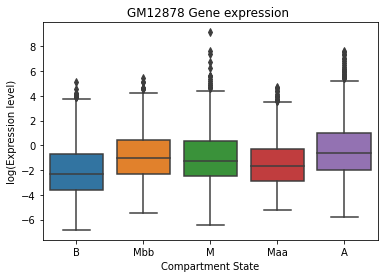

In [49]:
sns.boxplot(data=gm_data)
plt.gca().set_xticklabels(labels);
plt.title('GM12878 Gene expression ')
plt.xlabel('Compartment State')
plt.ylabel('log(Expression level)')

In [44]:
im_data = get_data(im_intersection[im_mask], 'HMM3P', 'Lung')

Text(0, 0.5, 'log(Expression level)')

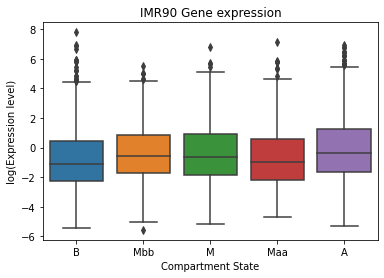

In [50]:
sns.boxplot(data=im_data)
plt.gca().set_xticklabels(labels);
plt.title('IMR90 Gene expression')
plt.xlabel('Compartment State')
plt.ylabel('log(Expression level)')

In [70]:
equal_mask = gm_intersection[gm_mask & im_mask].HMM3P ==  im_intersection[gm_mask & im_mask].HMM3P

In [225]:
compartment = 0
both_comparment = equal_mask & (gm_intersection.HMM3P==compartment)
gm_comparment = (~equal_mask) & (gm_intersection.HMM3P==compartment)
im_comparment = (~equal_mask) & (im_intersection.HMM3P==compartment)
none_comparment = (~(both_comparment | gm_comparment | im_comparment))




In [226]:
gm_intersection['type'] = 'None'

In [228]:
gm_intersection['type'].iloc[both_comparment] = 'both'
gm_intersection['type'].iloc[gm_comparment] = 'GM12878 only'
gm_intersection['type'].iloc[im_comparment] = 'IMR90 only'

In [229]:
gm_intersection['type'].unique()

array(['None', 'IMR90 only', 'both', 'GM12878 only'], dtype=object)

Text(0.5, 0, 'GM12878 log expression')

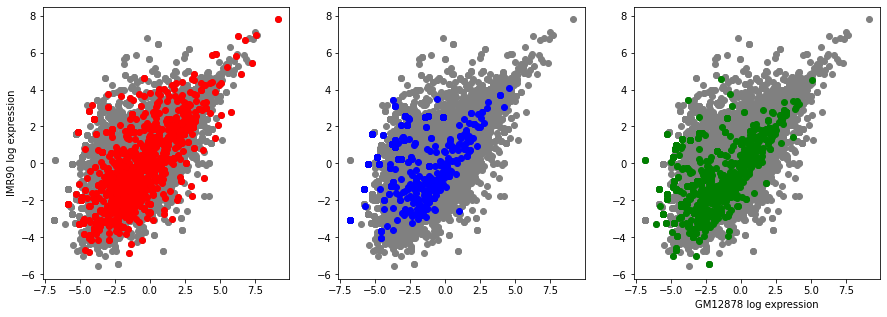

In [230]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(np.log(gm_intersection[ (gm_mask & im_mask)]['Cells - EBV-transformed lymphocytes'].values), 
            np.log(gm_intersection[ (gm_mask & im_mask)]['Lung'].values), c='gray'
           )
plt.scatter(np.log(gm_intersection[im_comparment]['Cells - EBV-transformed lymphocytes'].values), 
            np.log(gm_intersection[im_comparment]['Lung'].values), c='red'
           )
plt.ylabel('IMR90 log expression')
plt.subplot(132)
plt.scatter(np.log(gm_intersection[ (gm_mask & im_mask)]['Cells - EBV-transformed lymphocytes'].values), 
            np.log(gm_intersection[ (gm_mask & im_mask)]['Lung'].values), c='gray'
           )
plt.scatter(np.log(gm_intersection[gm_comparment]['Cells - EBV-transformed lymphocytes'].values), 
            np.log(gm_intersection[gm_comparment]['Lung'].values), c='blue'
           )

plt.subplot(133)
plt.scatter(np.log(gm_intersection[ (gm_mask & im_mask)]['Cells - EBV-transformed lymphocytes'].values), 
            np.log(gm_intersection[ (gm_mask & im_mask)]['Lung'].values), c='gray'
           )
plt.scatter(np.log(gm_intersection[both_comparment]['Cells - EBV-transformed lymphocytes'].values), 
            np.log(gm_intersection[both_comparment]['Lung'].values), c='green'
           )


plt.xlabel('GM12878 log expression')


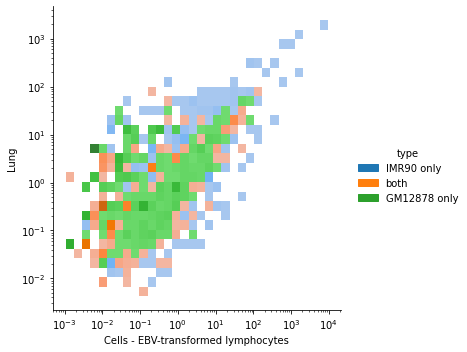

In [247]:
sns.displot(gm_intersection[ (~none_comparment)], 
            x='Cells - EBV-transformed lymphocytes', 
            y='Lung', log_scale=(True, True),  hue="type")

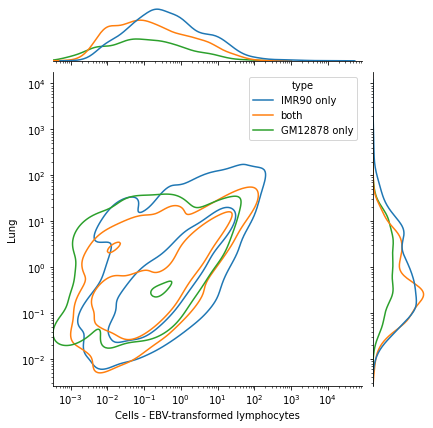

In [250]:
g= sns.jointplot(
            data=gm_intersection[(~none_comparment)], 
            x='Cells - EBV-transformed lymphocytes', 
            y='Lung', log_scale=(True, True),  hue="type", kind='kde', levels=3)
